Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

In [143]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.decomposition import TruncatedSVD

import pandas as pd

In [114]:
digits = load_digits()
# Number of images
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
# Getting the already known targets for each image
y = digits.target

In [87]:
X.shape

(1797, 64)

In [88]:
y.shape

(1797,)

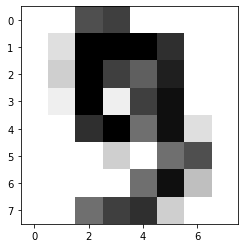

In [89]:
# let's look at digit "9"
plt.imshow(digits.images[9], cmap=plt.cm.gray_r,interpolation='nearest')

**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

*** Let's do all the tasks and additionaly try to use kNN classifier for prediction ***

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
# Print confusion matrix
confusion_matrix(y_test, predicted)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

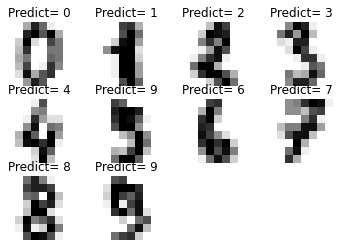

In [91]:
# Zip image with prediction
image_with_prediction = list(zip(digits.images, clf.predict(X)))

# for first 10 images
for pos, (image, prediction) in enumerate(image_with_prediction[:10]):
    plt.subplot(3, 4, pos+1) # Create 3x4 grid
    plt.axis('off') # no axis
    plt.imshow(image, cmap=plt.cm.gray_r) # show image in  gray scale and reverce it
    plt.title("Predict= %i" % prediction) # set title to predicted value
plt.show()

As we can see, our prediction is not very good. We have the mistake with digit "5".

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [92]:
kmeans = KMeans(init="random", n_clusters=10, n_init=100)
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)

In [93]:
kmeans_preds.shape

(1797,)

In [94]:
aggl = AgglomerativeClustering(linkage = 'average', n_clusters=10)
aggl_preds = aggl.fit_predict(X)

In [95]:
aggl_preds.shape

(1797,)

**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

In [96]:
def visualize_numbers(numbers):
    fig, axes = plt.subplots(nrows=3, ncols=4)
    fig.tight_layout()
    for pos, image in enumerate(numbers):
        axes[int(pos / 4)][pos % 4].imshow(image, cmap=plt.cm.gray_r) # show image in  gray scale and reverce it
        axes[int(pos / 4)][pos % 4].axis('off')
        axes[int(pos / 4)][pos % 4].set_title(f"Center #{pos}") # set title to predicted value
    axes[2][2].axis('off')
    axes[2][3].axis('off')
    plt.show() 

*** K-means ***

In [97]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[kmeans_preds == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

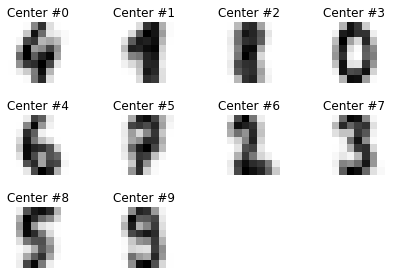

In [98]:
visualize_numbers(cluster_centers)

*** AgglomerativeClustering ***

In [99]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[aggl_preds == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

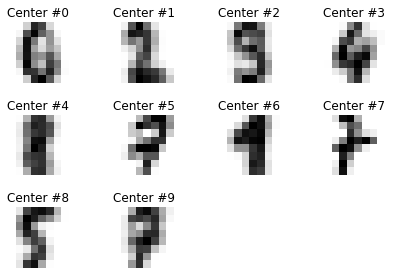

In [100]:
visualize_numbers(cluster_centers)

I think K-Means looks better than Agglomerative Clustering.

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

*** K-means ***

In [101]:
scores = []
ks = list(range(2, 21))

for k in tqdm(ks):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores.append(metrics.silhouette_score(X, preds))
index_max = np.argmax(scores) + 2
print('# Clasters(Silhouette max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

# Clasters(Silhouette max) =  9


*** AgglomerativeClustering ***

In [102]:
scores1 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    aggl = AgglomerativeClustering(linkage = 'average', n_clusters = k)
    preds = aggl.fit_predict(X)
    scores1.append(metrics.silhouette_score(X, preds))
index_max = np.argmax(scores1) + 2
print('# Clasters(Silhouette max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

# Clasters(Silhouette max) =  16


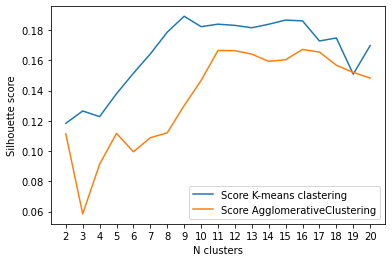

In [103]:
plt.plot(ks, scores)
plt.plot(ks, scores1)
plt.xticks(ks)
plt.xlabel('N clusters')
plt.ylabel('Silhouette score')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

*** K-means ***

In [104]:
scores2 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores2.append(metrics.v_measure_score(y, preds))
index_max = np.argmax(scores2) + 2
score_max = np.max(scores2)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(v_measure_score max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.7890708923718508
# Clasters(v_measure_score max) =  17


*** AgglomerativeClustering ***

In [105]:
scores3 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    aggl = AgglomerativeClustering(linkage = 'average', n_clusters = k)
    preds = aggl.fit_predict(X)
    scores3.append(metrics.v_measure_score(y, preds))
index_max = np.argmax(scores3) + 2
score_max = np.max(scores3)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(v_measure_score max) = ', index_max)


  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.798891168001257
# Clasters(v_measure_score max) =  20


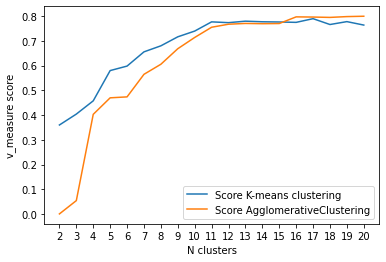

In [106]:
plt.plot(ks, scores2)
plt.plot(ks, scores3)
plt.xticks(ks)
plt.xlabel('N clusters')
plt.ylabel('v_measure score')
plt.legend(["Score K-means clustering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

*** K-means ***

In [107]:
f_num = [2, 5, 10, 20] # features numbers

In [108]:
scores4, scores5 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores4.append(metrics.silhouette_score(X, preds))
    scores5.append(metrics.v_measure_score(y, preds))

print('Silhouette (Value max) = ', np.max(scores4))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores4)])
print('v_measure_score (Value max) = ', np.max(scores5))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores5)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.1822716452685685
Features numbers - d'(Silhouette max) =  20
v_measure_score (Value max) =  0.7414296098316688
Features numbers - d'(v_measure_score max) =  20


*** AgglomerativeClustering ***

In [109]:
scores6, scores7 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X)
    aggl = AgglomerativeClustering(n_clusters = 10)
    preds = aggl.fit_predict(X_svd)
    scores6.append(metrics.silhouette_score(X, preds))
    scores7.append(metrics.v_measure_score(y, preds))

print('Silhouette (Value max) = ', np.max(scores6))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores6)])
print('v_measure_score (Value max) = ', np.max(scores7))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores7)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.1765881132796084
Features numbers - d'(Silhouette max) =  10
v_measure_score (Value max) =  0.8259753348813222
Features numbers - d'(v_measure_score max) =  10


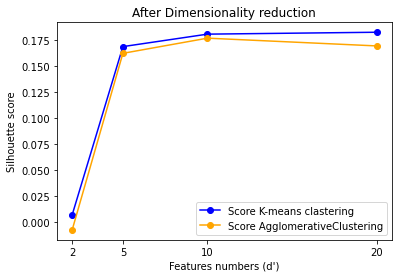

In [110]:
plt.plot(f_num, scores4, '-ok', color='blue')
plt.plot(f_num, scores6, '-ok', color='orange')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

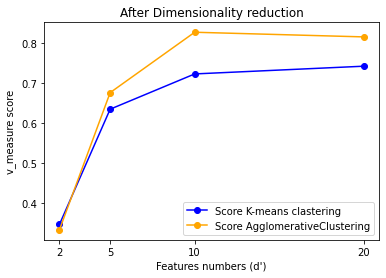

In [111]:
plt.plot(f_num, scores5, '-ok', color='blue')
plt.plot(f_num, scores7, '-ok', color='orange')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

CONCLUSION: As we can see, after Dimensionality reduction - Features numbers (𝑑′=10), with AgglomerativeClustering (# clusters = 10), v_measure score increase up to 0.825975 !!!

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

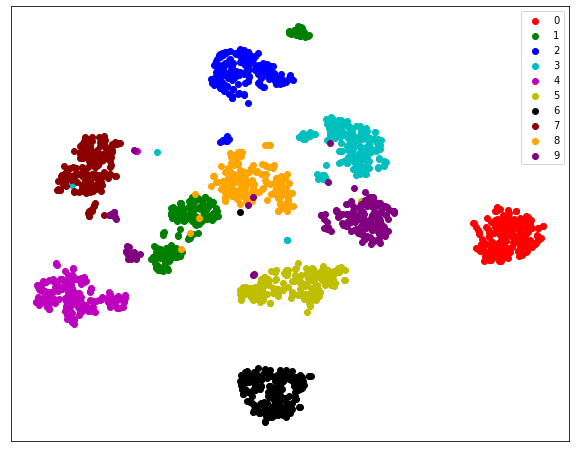

In [127]:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

target_ids = range(len(digits.target_names))

plt.figure(figsize=(10, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'darkred', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.xticks(())
plt.yticks(())
plt.show()

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

*** K-means ***

In [134]:
scores8, scores9 = [], []

kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(X_2d)
preds_best = kmeans.predict(X_2d)
scores8.append(metrics.silhouette_score(X, preds_best))
scores9.append(metrics.v_measure_score(y, preds_best))

print('Silhouette (TSNE) = ', np.max(scores8))
print('Features numbers = ', f_num[np.argmax(scores8)])
print('v_measure_score (TSNE) = ', np.max(scores9))
print('Features numbers = ', f_num[np.argmax(scores9)])

Silhouette (TSNE) =  0.16347034069873623
Features numbers =  2
v_measure_score (TSNE) =  0.9137798316714034
Features numbers =  2


*** AgglomerativeClustering ***

In [133]:
scores10, scores11 = [], []

aggl = AgglomerativeClustering(n_clusters = 10)
preds = aggl.fit_predict(X_2d)
scores10.append(metrics.silhouette_score(X, preds))
scores11.append(metrics.v_measure_score(y, preds))

print('Silhouette (TSNE) = ', np.max(scores10))
print('Features numbers = ', f_num[np.argmax(scores10)])
print('v_measure_score (TSNE) = ', np.max(scores11))
print('Features numbers = ', f_num[np.argmax(scores11)])

Silhouette (TSNE) =  0.1641788047760139
Features numbers =  2
v_measure_score (TSNE) =  0.9111471953871231
Features numbers =  2


CONCLUSION: After performing the tSNE-transformation of the matrix X (we left 2 features) - our v_measure_score  has increased:
- for K-means clastering       - v_measure_score = 0.9137798316714034
- for AgglomerativeClustering  - v_measure_score = 0.9111471953871231

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

In [135]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[preds_best == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

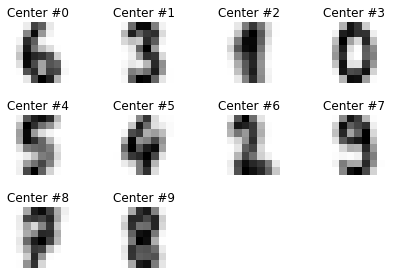

In [136]:
visualize_numbers(cluster_centers)

CONCLUSION: Yes ! ! ! We managed to achieve that each cluster corresponds to easily visually distinguishable one unique number!

# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

CONCLUSION:
1. I think, in our case, Agglomerative Clustering (hierarchical) is more convinient for our dataset. Agglomerative Clustering  mechanism finds points of data that are closest to each other, and successively groups them together. Agglomerative clustering is hierarchical because it performs operations sequentially. This algorithm is useful in cases where you want to make decisions about how coarsely or finely you want to group your data, or what resolution you want your data in.
2. It's very important to investigate different parameters of used algoritms. For instance, the very important parameter - n_clusters (the number of clusters you want) , where the data are successively merged, one at a time, until there are n clusters remaining
3. As we have seen from the conducted studies, the quality of clustering has improved significantly with a decrease in the dimension of the feature space. We got the best result when using the TSHE method to reduce the dimension of the feature space to 2.
We have received a criterion for assessing the quality of K-means = 0.914

**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [154]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

y_train = train_data['label']
X_train = train_data.drop(columns=['label'])

In [156]:
train_data.shape

(42000, 785)

In [160]:
y_train.shape

(42000,)

In [157]:
test_data.shape

(28000, 784)

Let's try to use the best algoritm TSNE

In [161]:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X_train)

In [164]:
X_2d.shape

(42000, 2)

*** K-means ***

In [165]:
scores12, scores13 = [], []

kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(X_2d)
preds_best = kmeans.predict(X_2d)
scores12.append(metrics.silhouette_score(X_train, preds_best))
scores13.append(metrics.v_measure_score(y_train, preds_best))

print('Silhouette (TSNE) = ', np.max(scores12))
print('Features numbers = ', f_num[np.argmax(scores12)])
print('v_measure_score (TSNE) = ', np.max(scores13))
print('Features numbers = ', f_num[np.argmax(scores13)])

Silhouette (TSNE) =  0.0330457288232603
Features numbers =  2
v_measure_score (TSNE) =  0.7280697125984997
Features numbers =  2


In [170]:
scores14, scores15 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X_train)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores14.append(metrics.silhouette_score(X_train, preds))
    scores15.append(metrics.v_measure_score(y_train, preds))

print('Silhouette (Value max) = ', np.max(scores14))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores14)])
print('v_measure_score (Value max) = ', np.max(scores15))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores15)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.05969764402531417
Features numbers - d'(Silhouette max) =  10
v_measure_score (Value max) =  0.48750651427329256
Features numbers - d'(v_measure_score max) =  20


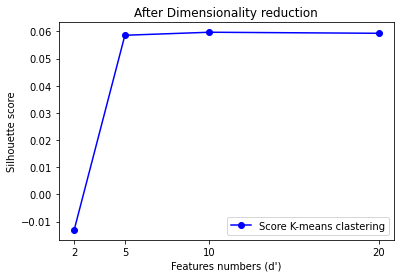

In [171]:
plt.plot(f_num, scores14, '-ok', color='blue')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

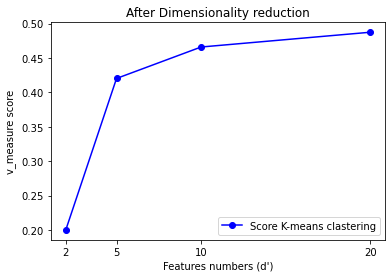

In [172]:
plt.plot(f_num, scores15, '-ok', color='blue')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

In [173]:
scores16, scores17 = [], []
f_num_1 = [30, 50, 70, 100] # features numbers

for k in tqdm(f_num_1):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X_train)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores16.append(metrics.silhouette_score(X_train, preds))
    scores17.append(metrics.v_measure_score(y_train, preds))

print('Silhouette (Value max) = ', np.max(scores16))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores16)])
print('v_measure_score (Value max) = ', np.max(scores17))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores17)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.05892084662240685
Features numbers - d'(Silhouette max) =  2
v_measure_score (Value max) =  0.49160247775548976
Features numbers - d'(v_measure_score max) =  20


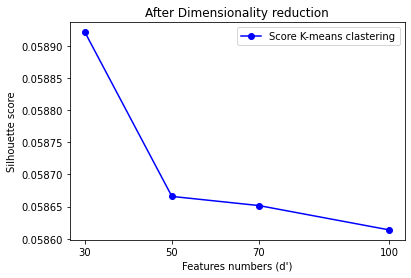

In [177]:
plt.plot(f_num_1, scores16, '-ok', color='blue')
plt.xticks(f_num_1)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="upper right")
plt.show()

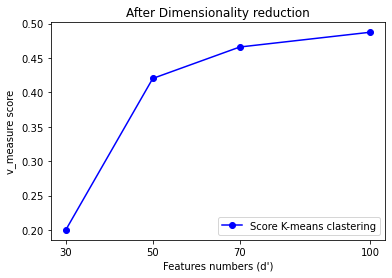

In [178]:
plt.plot(f_num_1, scores15, '-ok', color='blue')
plt.xticks(f_num_1)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

CONCLUSION: We've got the best result when using the TSHE method to reduce the dimension of the feature space to 2. We have received a criterion for assessing the quality of K-means = 0.7280697125984997 for dataset  MNIST Handwritten Digits.